In [144]:
#import  neccessary modules
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import mean_absolute_error
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree


%matplotlib inline

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving heart.csv to heart.csv


In [ ]:
import io
df = pd.read_csv(io.BytesIO(uploaded['heart.csv']))
# Dataset is now stored in a Pandas Dataframe

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Attribute Information
1.	Age: age of the patient [years]
2.	Sex: sex of the patient [M: Male, F: Female]
3.	ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
4.	RestingBP: resting blood pressure [mm Hg]
5.	Cholesterol: serum cholesterol [mm/dl]
6.	FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
7.	RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
8.	MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
9.	ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
10.	Oldpeak: oldpeak = ST [Numeric value measured in depression]
11.	ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
12.	HeartDisease: output class [1: heart disease, 0: Normal]


In [ ]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


Data exploration

Distribution of Heart Disease by Sex

In [ ]:
df.groupby('HeartDisease')['Sex'].value_counts()

HeartDisease  Sex
0             M      267
              F      143
1             M      458
              F       50
Name: Sex, dtype: int64

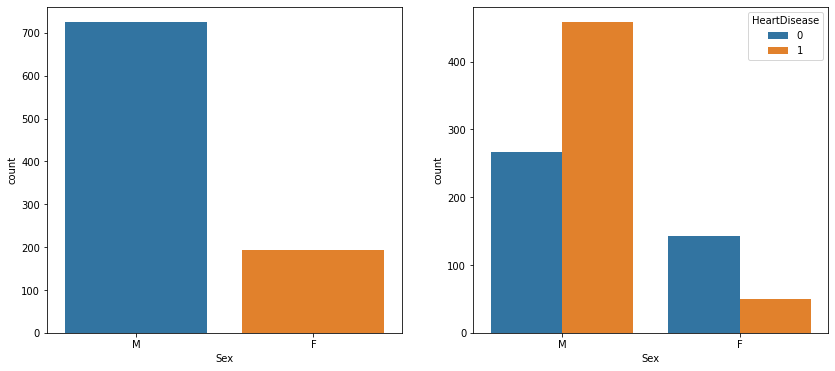

In [ ]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
#sns.plot(data=df, x='Sex')
sns.countplot(data=df, x='Sex', ax=ax1)
sns.countplot(data=df, x='Sex', hue='HeartDisease', ax=ax2)




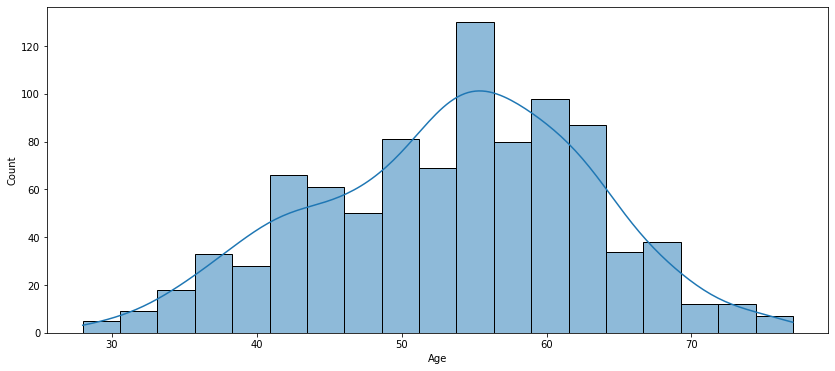

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data = df['Age'], kde = True)

In [ ]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


In [ ]:
df['ChestPainType'].value_counts()

ASY    496
NAP    203
ATA    173
TA      46
Name: ChestPainType, dtype: int64

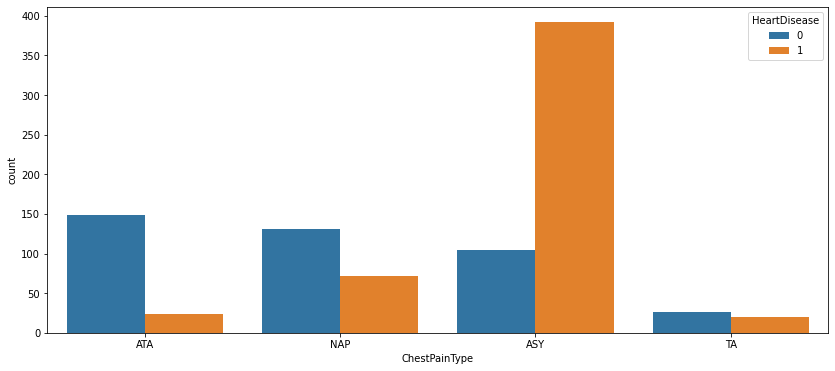

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='ChestPainType', hue='HeartDisease')

In [ ]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


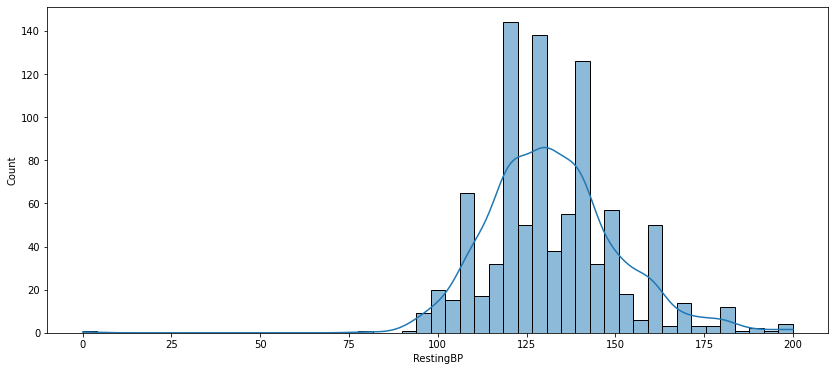

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data = df['RestingBP'], kde = True)

In [ ]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


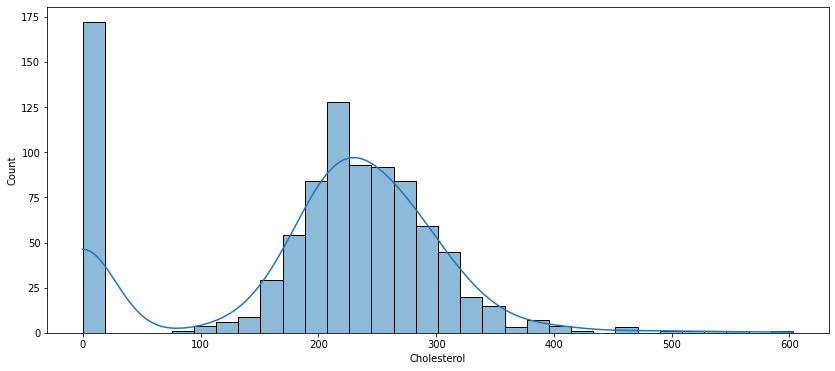

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data = df['Cholesterol'], kde = True)

In [ ]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


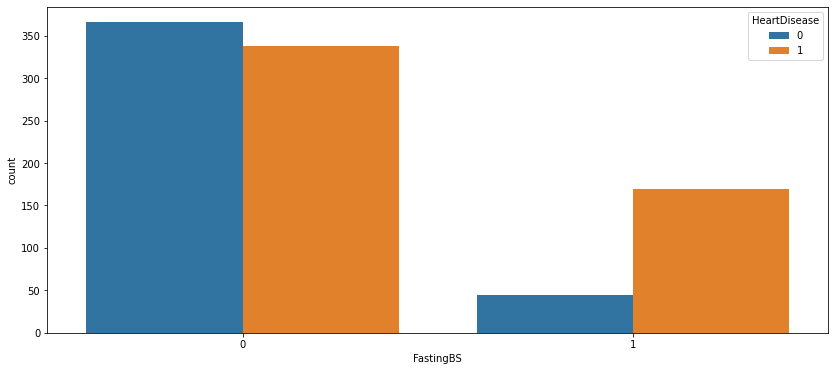

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='FastingBS', hue='HeartDisease')

In [ ]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


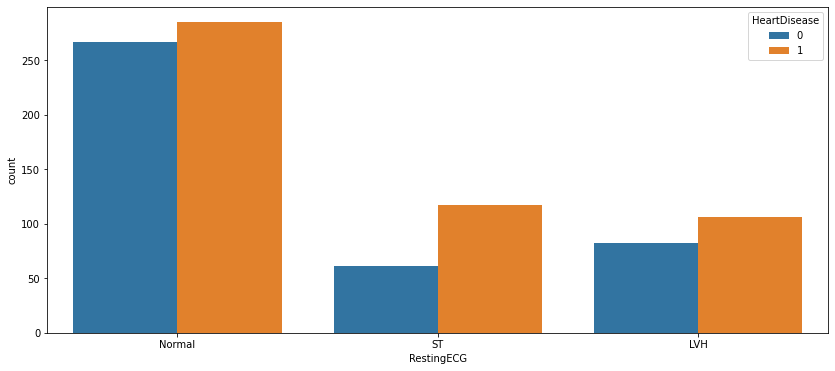

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='RestingECG', hue='HeartDisease')

In [ ]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


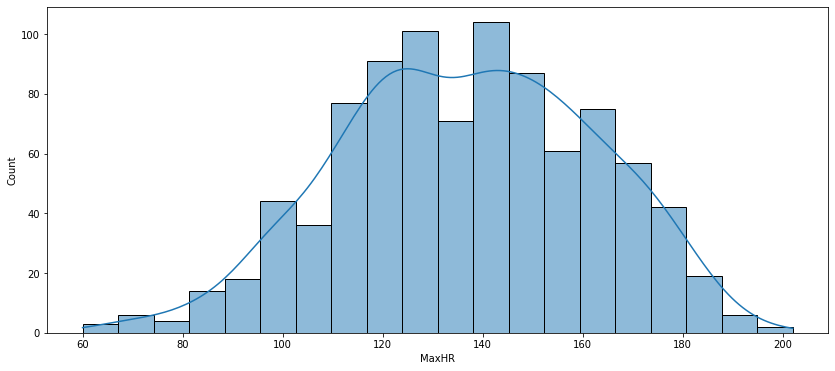

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data = df['MaxHR'], kde = True)

In [ ]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


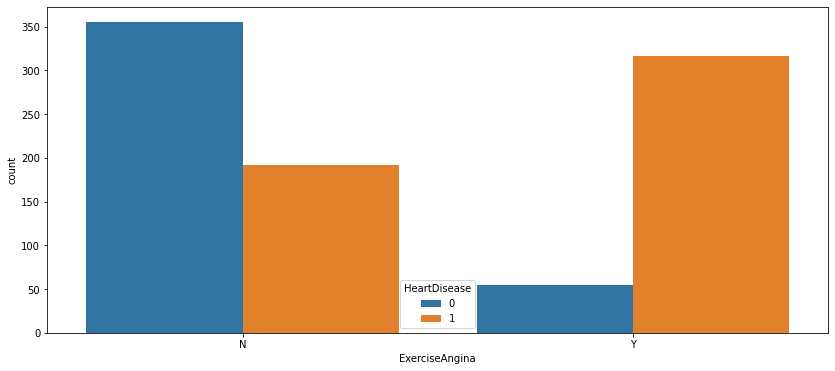

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='ExerciseAngina', hue='HeartDisease')

In [ ]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


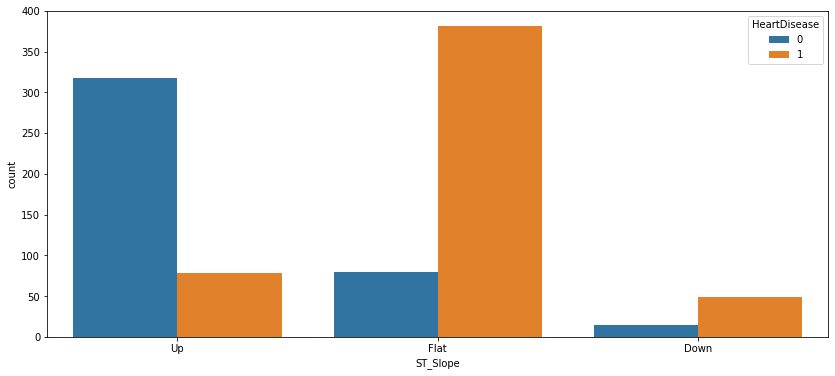

In [ ]:
plt.figure(figsize=(14,6))
sns.countplot(data=df, x='ST_Slope', hue='HeartDisease')

In [ ]:
df.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1


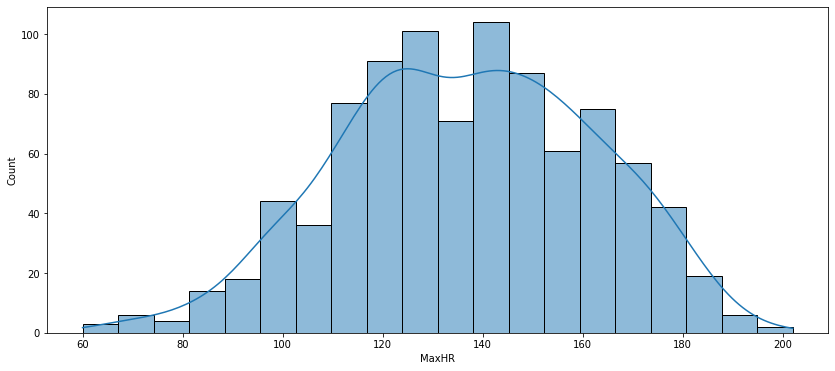

In [ ]:
plt.figure(figsize=(14,6))
sns.histplot(data = df['MaxHR'], kde = True)

Data Processing

In [ ]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [ ]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [ ]:
Features = df[df.columns[:-1]]
Features

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up
...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat


In [ ]:
Label = df[df.columns[-1]]
Label

0      0
1      1
2      0
3      1
4      0
      ..
913    1
914    1
915    1
916    1
917    0
Name: HeartDisease, Length: 918, dtype: int64

check for low and high cardinality colummns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
df.select_dtypes('object').nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

check for multicollinearity

In [ ]:
corr = Features.select_dtypes('number').corr()
corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000


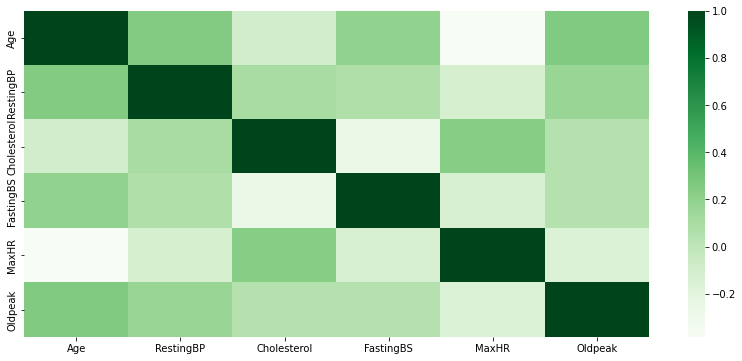

In [ ]:
#check for multicollinearity
#corr = df[numerical[:-1]].corr()
fig = plt.figure(figsize=(14,6))
sns.heatmap(corr, cmap='Greens')

In [ ]:
Features.drop(columns=['RestingBP', 'FastingBS', 'Oldpeak'], axis=1, inplace=True)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [ ]:
corr

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak
Age,1.000000,0.254399,-0.095282,0.198039,-0.382045,0.258612
RestingBP,0.254399,1.000000,0.100893,0.070193,-0.112135,0.164803
Cholesterol,-0.095282,0.100893,1.000000,-0.260974,0.235792,0.050148
FastingBS,0.198039,0.070193,-0.260974,1.000000,-0.131438,0.052698
MaxHR,-0.382045,-0.112135,0.235792,-0.131438,1.000000,-0.160691
Oldpeak,0.258612,0.164803,0.050148,0.052698,-0.160691,1.000000


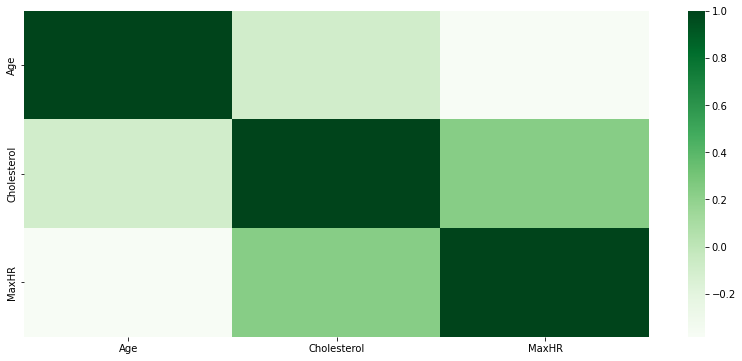

In [ ]:
#check for multicollinearity
corr = Features.select_dtypes('number').corr()
fig = plt.figure(figsize=(14,6))
sns.heatmap(corr, cmap='Greens')

Split data into train and test set

In [ ]:
X = Features
y = Label

In [ ]:
y = y.to_frame()

In [ ]:
from sklearn.model_selection import train_test_split

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))

Training Set: 642 rows
Test Set: 276 rows


Baseline accuracy

In [ ]:
round(y_train.value_counts(normalize=True).max(), 2)

0.54

In [141]:
#handle_unknown= 'ignore'
#Using OneHotEncoder as preprocessing
model = make_pipeline(
        OneHotEncoder(),
        LogisticRegression(max_iter=1000, C=0.001, solver='liblinear')
)

model.fit(X_train, y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('onehotencoder', OneHotEncoder()),
                ('logisticregression',
                 LogisticRegression(C=0.001, max_iter=1000,
                                    solver='liblinear'))])

In [74]:
predictions=model.predict(X_test)

In [72]:
#evaluate the performance of the model
from sklearn.metrics import accuracy_score


acc_train = accuracy_score(y_train, model.predict(X_train))
acc_test = accuracy_score(y_test, model.predict(X_test))


print("Training Accuracy:", round(acc_train, 2))
print("Test Accuracy:", round(acc_test, 2))

Training Accuracy: 0.87
Test Accuracy: 0.84


## ***Communication***

Estimates using a trained model in scikit-learn

In [76]:
y_train_pred_proba = model.predict_proba(X_train)
print(y_train_pred_proba[:5])
predictions[:5]

[[0.46066892 0.53933108]
 [0.48763397 0.51236603]
 [0.45283985 0.54716015]
 [0.45998007 0.54001993]
 [0.47378373 0.52621627]]


array([1, 1, 1, 1, 0])

Extraction of feature names and importances from the model. 

In [103]:
Features = model.named_steps['onehotencoder'].get_feature_names_out()

In [104]:
Features

array(['Age_28', 'Age_29', 'Age_31', 'Age_32', 'Age_33', 'Age_34',
       'Age_35', 'Age_36', 'Age_37', 'Age_38', 'Age_39', 'Age_40',
       'Age_41', 'Age_42', 'Age_43', 'Age_44', 'Age_45', 'Age_46',
       'Age_47', 'Age_48', 'Age_49', 'Age_50', 'Age_51', 'Age_52',
       'Age_53', 'Age_54', 'Age_55', 'Age_56', 'Age_57', 'Age_58',
       'Age_59', 'Age_60', 'Age_61', 'Age_62', 'Age_63', 'Age_64',
       'Age_65', 'Age_66', 'Age_67', 'Age_68', 'Age_69', 'Age_70',
       'Age_71', 'Age_72', 'Age_73', 'Age_74', 'Age_75', 'Age_76',
       'Age_77', 'Sex_F', 'Sex_M', 'ChestPainType_ASY',
       'ChestPainType_ATA', 'ChestPainType_NAP', 'ChestPainType_TA',
       'Cholesterol_0', 'Cholesterol_85', 'Cholesterol_100',
       'Cholesterol_110', 'Cholesterol_113', 'Cholesterol_117',
       'Cholesterol_123', 'Cholesterol_126', 'Cholesterol_129',
       'Cholesterol_132', 'Cholesterol_139', 'Cholesterol_141',
       'Cholesterol_142', 'Cholesterol_149', 'Cholesterol_153',
       'Cholesterol_15

In [129]:
coeff_importances = model.named_steps['logisticregression'].coef_[0]


In [130]:
coeff_importances

array([-4.66065268e-04, -1.38933311e-03, -2.23510077e-05, -4.64750943e-04,
       -2.32628021e-05,  6.60829105e-05, -5.15918415e-04, -9.95390062e-04,
       -2.89838366e-03,  1.79923089e-03, -3.33722836e-03, -5.12594488e-04,
       -3.78900402e-03, -3.51566278e-03, -2.46113397e-03, -2.87032669e-03,
       -3.45510639e-03, -4.06189145e-04,  8.00504474e-04, -2.04476849e-03,
       -5.22805597e-04, -8.35969314e-04,  6.60078707e-04,  6.40496894e-04,
       -2.91848949e-03, -1.36917675e-03,  1.40343526e-03,  8.56041640e-04,
        2.98026339e-03,  5.13171260e-03,  2.74828717e-03,  1.84024423e-03,
        4.32600345e-03,  5.57038479e-03,  5.06135019e-03,  1.86087663e-03,
        4.38004848e-03, -1.38789218e-04,  2.65753405e-03, -7.46290700e-05,
        1.63783246e-03,  1.33261284e-03, -5.14835982e-04,  3.84644240e-04,
        5.34513851e-04,  9.37736494e-04, -9.56666324e-05,  6.45870850e-07,
        4.69370792e-04, -2.71940603e-02,  3.96361609e-02,  7.87332666e-02,
       -4.43974141e-02, -

In [131]:
feature_importance = pd.Series(coeff_importances, index=Features).sort_values(ascending=True)

Create a horizontal bar chart with the 5 largest coefficients from feature_importance. Be sure to label your x-axis "Odds Ratio".

In [126]:
feature_importance

ST_Slope_Up         -0.088651
ExerciseAngina_N    -0.060282
ChestPainType_ATA   -0.044397
Sex_F               -0.027194
ChestPainType_NAP   -0.021807
                       ...   
Cholesterol_0        0.034064
Sex_M                0.039636
ExerciseAngina_Y     0.072724
ChestPainType_ASY    0.078733
ST_Slope_Flat        0.089359
Length: 372, dtype: float64

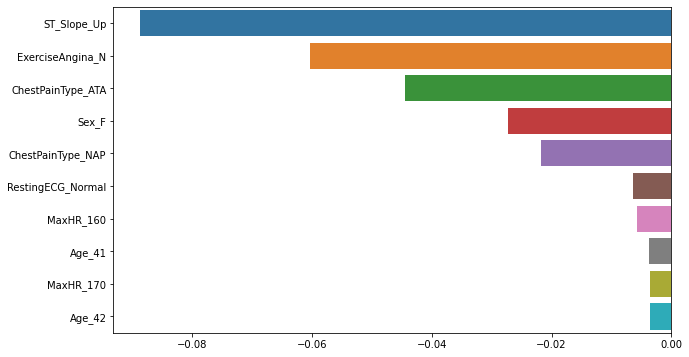

In [134]:
plt.figure(figsize=(10,6))
#feature_importance.tail().plot(kind='barh', xlabel = 'odds Ratio')
sns.barplot(x=feature_importance[:10], y=feature_importance.index[:10], orient='h')

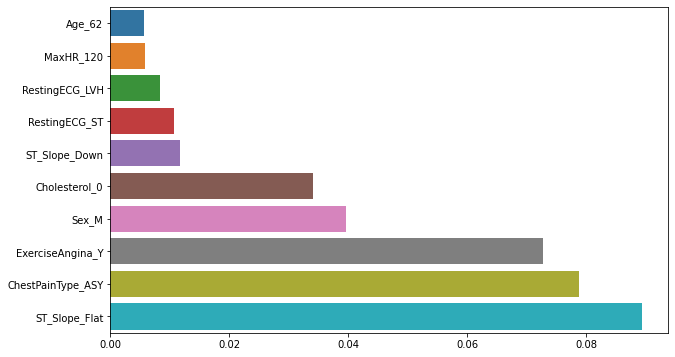

In [139]:
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importance[-10:], y=feature_importance.index[-10:], orient='h')

In [172]:
import joblib

# Save the model as a pickle file
filename = 'Heart_model.pkl'
joblib.dump(model, filename)

['Heart_model.pkl']